In [1]:
import torch
import flowtorch.bijectors as bij
import flowtorch.distributions as dist

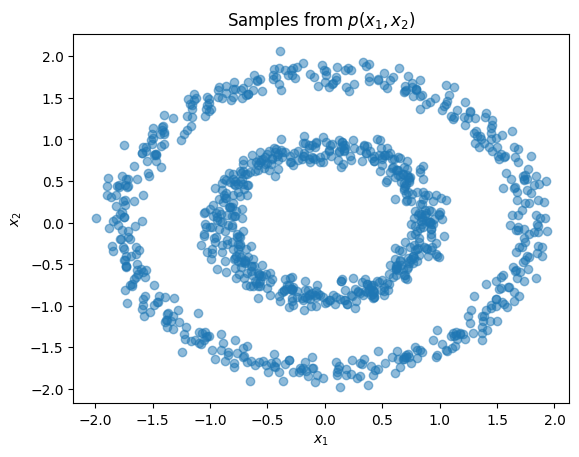

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
n_samples = 1000
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
X = StandardScaler().fit_transform(X)

plt.title(r'Samples from $p(x_1,x_2)$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show()

/tmp/ipykernel_35650/1379743158.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:,0], hist=False, kde=True,
/tmp/ipykernel_35650/1379743158.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:,1], hist=False, kde=True,


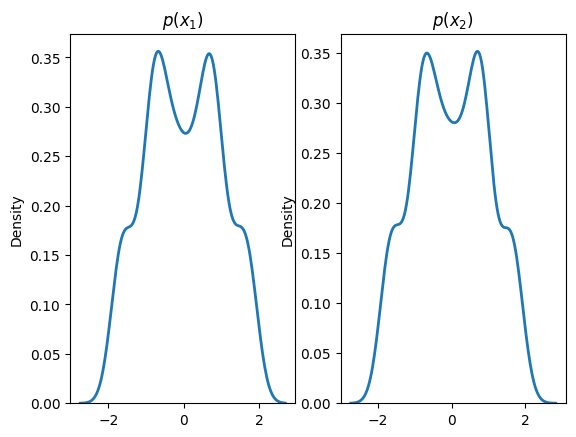

In [5]:
plt.subplot(1, 2, 1)
sns.distplot(X[:,0], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title(r'$p(x_1)$')
plt.subplot(1, 2, 2)
sns.distplot(X[:,1], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title(r'$p(x_2)$')
plt.show()

In [6]:
dist_x = torch.distributions.Independent(
  torch.distributions.Normal(torch.zeros(2), torch.ones(2)), 
  1
)
bijector = bij.Spline()
dist_y = dist.Flow(dist_x, bijector)

In [7]:
optimizer = torch.optim.Adam(dist_y.parameters(), lr=1e-2)
steps = 5000
X = torch.Tensor(X)
for step in range(steps):
    optimizer.zero_grad()
    loss = -dist_y.log_prob(X).mean()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print('step: {}, loss: {}'.format(step, loss.item()))

step: 0, loss: 2.8302547931671143
step: 200, loss: 2.5553951263427734
step: 400, loss: 2.5515506267547607
step: 600, loss: 2.5461385250091553
step: 800, loss: 2.5432937145233154
step: 1000, loss: 2.5425820350646973
step: 1200, loss: 2.542062282562256
step: 1400, loss: 2.54268741607666
step: 1600, loss: 2.5410306453704834
step: 1800, loss: 2.542025327682495
step: 2000, loss: 2.54148530960083
step: 2200, loss: 2.5407216548919678
step: 2400, loss: 2.543154716491699
step: 2600, loss: 2.5411770343780518
step: 2800, loss: 2.5412683486938477
step: 3000, loss: 2.5420730113983154
step: 3200, loss: 2.541872501373291
step: 3400, loss: 2.5412230491638184
step: 3600, loss: 2.5417258739471436
step: 3800, loss: 2.541703939437866
step: 4000, loss: 2.542025327682495
step: 4200, loss: 2.542113780975342
step: 4400, loss: 2.5407052040100098
step: 4600, loss: 2.5416078567504883
step: 4800, loss: 2.5416147708892822


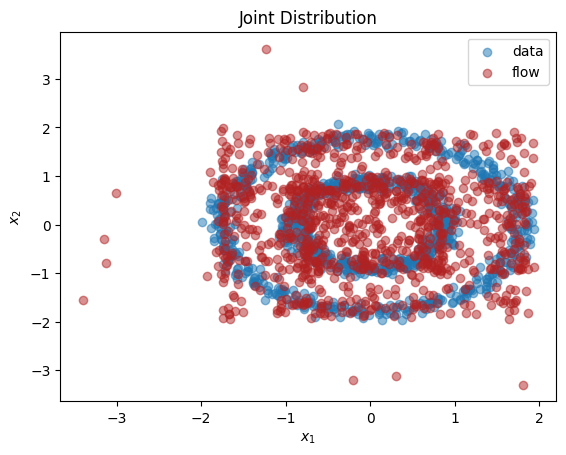

In [8]:
X_flow = dist_y.sample(torch.Size([1000,])).detach().numpy()
plt.title(r'Joint Distribution')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.scatter(X[:,0], X[:,1], label='data', alpha=0.5)
plt.scatter(X_flow[:,0], X_flow[:,1], color='firebrick', label='flow', alpha=0.5)
plt.legend()
plt.show()

/tmp/ipykernel_35650/3323904460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:,0], hist=False, kde=True,
/tmp/ipykernel_35650/3323904460.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_flow[:,0], hist=False, kde=True,
/tmp/ipykernel_35650/3323904460.py:14: UserWa

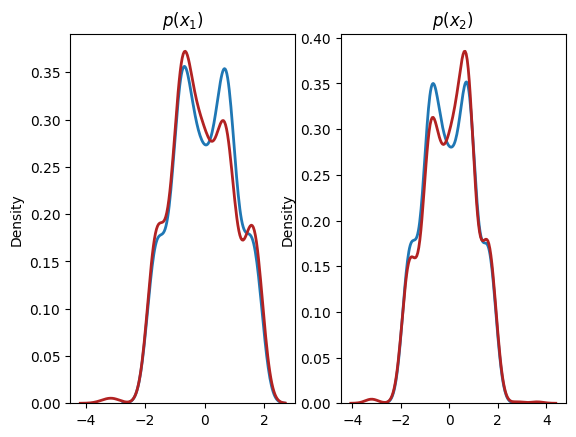

In [9]:
plt.subplot(1, 2, 1)
sns.distplot(X[:,0], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='data')
sns.distplot(X_flow[:,0], hist=False, kde=True,
             bins=None, color='firebrick',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='flow')
plt.title(r'$p(x_1)$')
plt.subplot(1, 2, 2)
sns.distplot(X[:,1], hist=False, kde=True,
             bins=None,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='data')
sns.distplot(X_flow[:,1], hist=False, kde=True,
             bins=None, color='firebrick',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='flow')
plt.title(r'$p(x_2)$')
plt.show()